# Introduction to `pandas`

*Space-Time Analytics — Lecture 2c*

* **Prof. Carson J. Q. Farmer**  
    <i class="fa-fw fa fa-twitter"></i> [@carsonfarmer](https://twitter.com/carsonfarmer)  
    <i class="fa-fw fa fa-globe"></i> [carsonfarmer.com](https://carsonfarmer.com)  
    <i class="fa-fw fa fa-envelope-o"></i> [carson.farmer@colorado.edu](mailto:carson.farmer@colorado.edu)  
    <i class="fa-fw fa fa-github-alt"></i> [github.com/carsonfarmer](https://github.com/carsonfarmer)  
    <i class="fa-fw fa fa-briefcase"></i> Guggenheim Building Room 207  
    <i class="fa-fw fa fa-clock-o"></i> Wednesdays 2:00-3:00 PM and 4:15-5:15 PM  

## Introduction

`Python` has always been great for prepping and munging data, but it's never been great for analysis — you'd usually end up using `R` (or worse, `Excel`). `pandas` makes Python great for **analysis**.

## Data Structures

`pandas` introduces two new data structures to `Python` - `Series` and `DataFrame`, both of which are built on top of `numpy` (this means it's fast).

In [1]:
# Boilerplate imports...
%config InlineBackend.figure_format = 'svg'
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns  # Makes for nicer plots
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 8, 4

### `Series`

A `Series` is a one-dimensional object similar to an array, list, or column in a table. It will assign a labeled index to each item in the `Series`. By default, each item will receive an index label from `0` to `N`, where `N` is the length of the `Series` minus one.

In [2]:
# Create a Series with an arbitrary list
l = [7, 'Heisenberg', 3.14, -1789710578, 'Happy Eating!']
s = pd.Series(l)
s

0                7
1       Heisenberg
2             3.14
3      -1789710578
4    Happy Eating!
dtype: object

Alternatively, you can specify an index to use when creating the Series.

In [3]:
s = pd.Series([7, 'Heisenberg', 3.14, -1789710578, 'Happy Eating!'],
              index=['A', 'Z', 'C', 'Y', 'E'])
s

A                7
Z       Heisenberg
C             3.14
Y      -1789710578
E    Happy Eating!
dtype: object

The `Series` constructor can convert a dictonary (`dict`) as well, using the keys of the dictionary as its index.

In [4]:
d = {'Chicago': 1000, 'New York': 1300, 'Portland': 900, 'San Francisco': 1100,
     'Austin': 450, 'Boston': None}
cities = pd.Series(d)
cities

Austin            450.0
Boston              NaN
Chicago          1000.0
New York         1300.0
Portland          900.0
San Francisco    1100.0
dtype: float64

In [5]:
cities.iloc[0]

450.0

You can use the index to select specific items from the `Series`...

In [6]:
print(type(cities['Chicago']))
names = ['Chicago', 'Portland', 'San Francisco']
cities[['Chicago', 'Portland', 'San Francisco']]

<class 'numpy.float64'>


Chicago          1000.0
Portland          900.0
San Francisco    1100.0
dtype: float64

Or you can use boolean indexing for selection.

In [7]:
cities[cities > 1000]

New York         1300.0
San Francisco    1100.0
dtype: float64

That last one might be a little weird, so let's make it more clear - `cities < 1000` returns a `Series` of `True`/`False` values, which we then pass to our Series cities, returning the corresponding `True` items.

In [8]:
less_than_1000 = cities < 1000
print(less_than_1000)
print(cities[less_than_1000])

Austin            True
Boston           False
Chicago          False
New York         False
Portland          True
San Francisco    False
dtype: bool
Austin      450.0
Portland    900.0
dtype: float64


You can also change the values in a `Series` on the fly.

In [9]:
# Changing based on the index
print('Old value:', cities['Chicago'])
cities['Chicago'] = 1400
print('New value:', cities['Chicago'])

Old value: 1000.0
New value: 1400.0


In [10]:
# Changing values using boolean logic
print(cities[cities < 1000])
cities[cities < 1000] = 750

print(cities[cities < 1000])

Austin      450.0
Portland    900.0
dtype: float64
Austin      750.0
Portland    750.0
dtype: float64


What if you aren't sure whether an item is in the `Series`? You can check using idiomatic `Python`.

In [11]:
print('Seattle' in cities)
print('San Francisco' in cities)

False
True


Mathematical operations can be done using scalars and functions.

In [12]:
# Divide city values by 3
cities / 3

Austin           250.000000
Boston                  NaN
Chicago          466.666667
New York         433.333333
Portland         250.000000
San Francisco    366.666667
dtype: float64

In [13]:
# Square city values
cities

Austin            750.0
Boston              NaN
Chicago          1400.0
New York         1300.0
Portland          750.0
San Francisco    1100.0
dtype: float64

You can add two `Series` together, which returns a union of the two Series with the addition occurring on the shared index values. Values on either `Series` that did not have a shared index will produce a `NULL`/`NaN` (not a number).

In [14]:
print(cities[['Chicago', 'New York', 'Portland']])
print('\n')
print(cities[['Austin', 'New York']])
print('\n')
print(cities[['Chicago', 'New York', 'Portland']] + cities[['Austin', 'New York']])

Chicago     1400.0
New York    1300.0
Portland     750.0
dtype: float64


Austin       750.0
New York    1300.0
dtype: float64


Austin         NaN
Chicago        NaN
New York    2600.0
Portland       NaN
dtype: float64


Notice that because Austin, Chicago, and Portland were not found in both Series, they were returned with `NULL`/`NaN` values.

`NULL` checking can be performed with `isnull` and `notnull`.

In [15]:
# Returns a boolean series indicating which values aren't NULL
cities.isnull()

Austin           False
Boston            True
Chicago          False
New York         False
Portland         False
San Francisco    False
dtype: bool

In [16]:
# Use boolean logic to grab the NULL cities
print(cities.isnull())
print('\n')
print(cities[cities.isnull()])

Austin           False
Boston            True
Chicago          False
New York         False
Portland         False
San Francisco    False
dtype: bool


Boston   NaN
dtype: float64


### `DataFrame`

A `DataFrame` is a tablular data structure comprised of rows and columns, akin to a spreadsheet, database table, or `R`'s `data.frame` object. You can also think of a `DataFrame` as a group of `Series` objects that share an index (the column names).

<div style="float: left;">
`Series`
<img style="height: 200px" src="http://www.ikea.com/us/en/images/products/kallax-shelf-unit__0243969_PE383237_S4.JPG"></img>
</div>
<div style="float: right;">
`DataFrame`
<img style="height: 200px" src="http://www.ikea.com/us/en/images/products/kallax-shelf-unit__0327429_PE519766_S4.JPG"></img>
</div>

For the rest of the tutorial, we'll be primarily working with `DataFrames`.

## Reading Data

To create a `DataFrame` out of common `Python` data structures, we can pass a dictionary of lists to the `DataFrame` constructor.

Using the columns parameter allows us to tell the constructor how we'd like the columns ordered. By default, the `DataFrame` constructor will order the columns alphabetically (though this isn't the case when reading from a file - more on that next).

In [17]:
data = {'year': [2010, 2011, 2012, 2011, 2012, 2010, 2011, 2012],
        'team': ['Bears', 'Bears', 'Bears', 'Packers', 'Packers', 'Lions', 'Lions', 'Lions'],
        'wins': [11, 8, 10, 15, 11, 6, 10, 4],
        'losses': [5, 8, 6, 1, 5, 10, 6, 12]}
football = pd.DataFrame(data, columns=['year', 'team', 'wins', 'losses'])
football

,year,team,wins,losses
0,2010,Bears,11,5
1,2011,Bears,8,8
2,2012,Bears,10,6
3,2011,Packers,15,1
4,2012,Packers,11,5
5,2010,Lions,6,10
6,2011,Lions,10,6
7,2012,Lions,4,12


Much more often, you'll have a dataset you want to read into a `DataFrame`. Let's go through several common ways of doing so.

### CSV

Reading a CSV is as simple as calling the `read_csv` function. By default, the `read_csv` function expects the column separator to be a comma, but you can change that using the `sep` parameter.

<i class="fa fa-database"></i> Here's an [example CSV file](http://www.mosaic-web.org/go/datasets/swim100m.csv) from the `mosaic` project, which contains 100 meter world records for men and women over time from 1905 through 2004. It contains 62 observations of the following variables:

* `time`: time (in seconds) of the world record
* `year`: Year in which the record was set
* `sex`: a categorical variable with `'M'`ale and `'F'`emale categories

Go ahead an download this file to your computer (somewhere useful like `folder/that/contains/this/Notebook/files/swim100m.csv`) is good.

<br/>
<div class="alert alert-info" style="font-size: .8em;">
\* Moving forward, the <i class="fa fa-database"></i> icon is the convention I'll use for alerting you to input datasets.
</div>

In [18]:
from_csv = pd.read_csv('files/swim100m.csv')
from_csv.head()

,year,time,sex
0,1905,65.8,M
1,1908,65.6,M
2,1910,62.8,M
3,1912,61.6,M
4,1918,61.4,M


Our file had headers, which the function inferred upon reading in the file. Had we wanted to be more explicit, we could have passed `header=None` to the function along with a list of column names to use.

<i class="fa fa-database"></i> For our next example, we'll use [daily weather data for Boulder, CO](http://140.172.12.69:80/psd/boulder/data/boulderdaily.complete) from www.esrl.noaa.gov. Download this file to your computer (as before). Note, the bottom 14 lines of this file looks like this:

```
Data is at http://www.esrl.noaa.gov/psd/boulder/
Data MAY have transcription
errors at original source

Format: year, mon, day, tmax, tmin, precip, snow, snowcover
units: degF for temperature; inches precip and snow
precipitation is precise to 1/100 inch
snowfall is precise to 1/10 inch
depth of snow on the ground (snowcover) is precise 
to the nearest inch
temperature is precise to 1 degree

See webpage for more details
This file produced by CAS AT NOAA/ESRL PSD
```
 
So we'll need to 'skip' these lines when we read in our data:

In [19]:
cols = ["year", "mon", "day", "tmax", "tmin", "precip", "snow", "snowcover"]
no_headers = pd.read_csv("files/boulderdaily.complete", sep='\s+', header=None,
                         names=cols, skiprows=1, skipfooter=14, engine='python',
                         na_values=["-998", "-998.00", "-999.00"])
no_headers.dropna().head()

,year,mon,day,tmax,tmin,precip,snow,snowcover
18879,1948,8,1,89.0,58.0,0.01,0.0,0.0
18880,1948,8,2,90.0,56.0,0.01,0.0,0.0
18881,1948,8,3,77.0,57.0,0.02,0.0,0.0
18882,1948,8,4,67.0,57.0,0.12,0.0,0.0
18883,1948,8,5,79.0,57.0,0.04,0.0,0.0


`pandas`' various reader functions have many parameters allowing you to do things like skipping lines of the file, parsing dates, or specifying how to handle `NA`/`NULL` data-points. We've taken advantage of several of these features here.

There's also a set of writer functions for writing to a variety of formats (CSVs, HTML tables, JSON). They function exactly as you'd expect and are typically called to_format: `my_dataframe.to_csv('path_to_file.csv')`

Take a look at the [I/O documentation](http://pandas.pydata.org/pandas-docs/stable/io.html) to familiarize yourself with file reading/writing functionality.

### Excel

Know who hates converting between file formats? Me. I bet you do, too. Thankfully, `pandas` allows you to read and write `Excel` files natively, so you can easily read from `Excel`, write your code in `Python`, and then write back out to `Excel` - no need for VBA or anything crazy!

Reading `Excel` files requires the `openpyxl` library. You can install it via `conda` (`conda install openpyxl`) if you don't already have it.

Let's first *write* a `DataFrame` to `Excel`.

In [20]:
# This is the DataFrame we created from a dictionary earlier
football.head()

,year,team,wins,losses
0,2010,Bears,11,5
1,2011,Bears,8,8
2,2012,Bears,10,6
3,2011,Packers,15,1
4,2012,Packers,11,5


In [21]:
# Since our index on the football DataFrame is meaningless, let's not write it
football.to_excel('files/football.xlsx', index=False)

In [22]:
# Use glob to list xlsx files in files directory
import glob
print(glob.glob("files/*.xlsx"))

['files/football.xlsx']


In [23]:
# Delete the DataFrame in memory
del football
# And read in our newly created Excel file
football = pd.read_excel('files/football.xlsx', 'Sheet1')
football

,year,team,wins,losses
0,2010,Bears,11,5
1,2011,Bears,8,8
2,2012,Bears,10,6
3,2011,Packers,15,1
4,2012,Packers,11,5
5,2010,Lions,6,10
6,2011,Lions,10,6
7,2012,Lions,4,12


### Clipboard

While the results of a query can be read directly into a `DataFrame`, sometimes its useful to read the results directly from the clipboard. This works just as well with any type of delimited data you've copied to your clipboard. The function does a good job of inferring the delimiter, but you can also use the `sep` parameter to be explicit.

We'll start by going to the NOAA [Boulder, Colorado Weather and Climate](http://www.esrl.noaa.gov/psd/boulder/Boulder.mm.precip.html) page, and copying the HTML table of monthly precipitation values.

In [24]:
precip = pd.read_clipboard()
precip.head()

,https://ndownloader.figshare.com/files/2292171,-O,files/portal_mammals.sqlite


### URL and HTML

With `read_table`, we can also read directly from a URL.

We'll use the swim records data again, only this time, we'll grab it directly from the url:

In [25]:
url = 'http://www.mosaic-web.org/go/datasets/swim100m.csv'

# Fetch the text from the URL and read it into a DataFrame
from_url = pd.read_csv(url, sep=',')
print(from_url.head(3))
print(from_csv.head(3))  # They should be the same

   year  time sex
0  1905  65.8   M
1  1908  65.6   M
2  1910  62.8   M
   year  time sex
0  1905  65.8   M
1  1908  65.6   M
2  1910  62.8   M


We can do a similar thing with our previous clipboard example. This time, we'll access the HTML table directly, rather than copying the table to our clipboard:

In [26]:
df_list = pd.read_html('http://www.esrl.noaa.gov/psd/boulder/Boulder.mm.precip.html', header=0)

In [27]:
type(df_list)

list

In [28]:
df_list[0].head()  # How cool is that?!

,Year,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,YEAR TOTAL
0,1893,0.05,0.70,0.25,1.00,2.00,0.50,0.60,0.75,0.60,1.16,0.80,0.39,8.80**
1,1894,0.16,0.82,1.40,2.30,4.50,0.80,3.08,0.84,2.10,0.10,0.30,0.67,17.07
2,1895,0.30,0.66,1.98,1.89,4.28,3.77,4.31,0.82,0.50,1.27,0.44,0.13,20.35
3,1896,0.38,0.50,1.74,0.84,5.60,1.69,1.53,1.93,1.67,0.59,0.00,0.20,16.67
4,1897,0.23,0.80,2.40,0.94,2.30,3.71,3.09,2.96,0.86,1.66,0.47,0.70,20.12


### Database

`pandas` also has some support for reading/writing `DataFrames` directly [from/to a database](http://pandas.pydata.org/pandas-docs/stable/io.html#sql-queries). You'll typically just need to pass a connection object or `sqlalchemy` engine to the `read_sql` or `to_sql` functions within the `pandas.io` module.

<br/>
<div class="alert alert-warning" style="font-size:.8em;">
Note that `to_sql` executes as a series of `INSERT INTO` statements and thus trades speed for simplicity. If you're writing a large `DataFrame` to a database, it might be quicker to write the `DataFrame` to CSV and load that directly using the database's file import arguments.
</div>

Here we'll use a simplified version of the [Portal Project](http://dx.doi.org/10.6084/m9.figshare.1314459) database designed for teaching. 

It provides a real world example of life-history, population, and ecological data, with sufficient complexity to teach many aspects of data analysis and management, but with many complexities removed to allow students to focus on the core ideas and skills being taught.

<i class="fa fa-database"></i> The database is currently available in csv, json, and **sqlite** (which you can download [from here](https://ndownloader.figshare.com/files/2292171 -O files/portal_mammals.sqlite)). Again, save this to your `files` folder.

In [29]:
from pandas.io import sql
import sqlite3

conn = sqlite3.connect('files/portal_mammals.sqlite')
query = "SELECT * FROM species WHERE taxa = 'Rodent';"

results = sql.read_sql(query, con=conn, index_col="species_id")
results.head()

,genus,species,taxa
species_id,,,
AH,Ammospermophilus,harrisi,Rodent
BA,Baiomys,taylori,Rodent
DM,Dipodomys,merriami,Rodent
DO,Dipodomys,ordii,Rodent
DS,Dipodomys,spectabilis,Rodent


## Plotting (Crash Course)

Before we finish up, here are a few examples of plotting via `pandas`. We will learn more about plotting with `Python` in subsequent weeks...

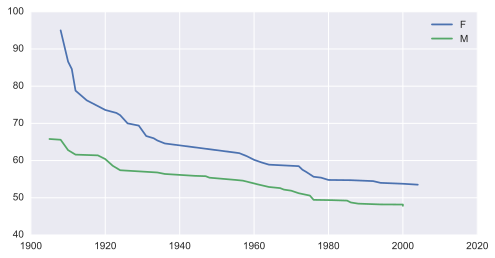

In [30]:
# Multi-line plot

from_url.set_index("year", inplace=True)
for key, grp in from_url.groupby("sex"):
    plt.plot(grp.time, label=key)
plt.legend(loc='best')    
plt.show()

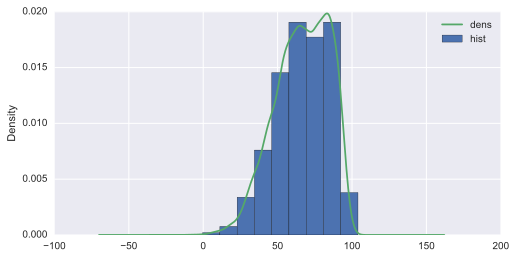

In [31]:
# Histogram & Density Plot

clean = no_headers.dropna()
ax = clean.tmax.hist(normed=True, label="hist")
ax = clean.tmax.plot(kind="density", ax=ax, label="dens")
le = plt.legend(loc="best")

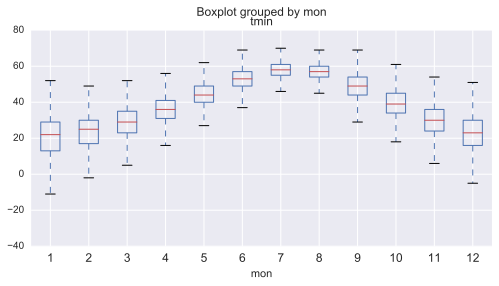

In [32]:
# Boxplot grouped by...
ax = clean.boxplot(column="tmin", by="mon")

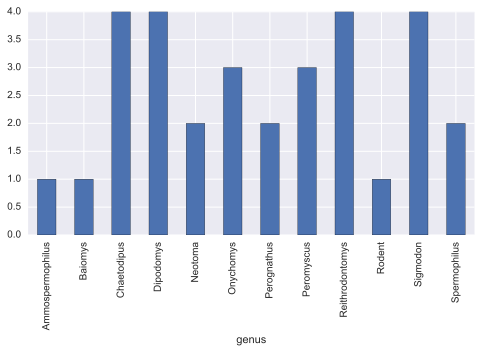

In [33]:
# Bar plot with aggregation

ax = results.groupby("genus").taxa.count().plot(kind="bar")

## Moving on...

On the official [`pandas`](http://pandas.pydata.org/) website you can find details of the types of problems for which `pandas` is useful, however, one thing `pandas` *is* particularly good at is **time-series** manipulation, visualization, and analysis — it makes analysis and visualization of 1-D data, especially time series, **much** faster.

* Before `pandas`, working with time-series in `Python` was a pain... now it's fun 😀.
* Ease-of-use stimulates in-depth exploration of data:
    * Why wouldn't you do some additional analysis if it's just one extra line of code?
    
And on that note... its time to move on!